## Data understanding and Cleaning

**Explation of Features:**

**Intersection :** An intersection is an at-grade junction where two or more roads or streets meet or cross. Intersections may be classified by number of road segments, traffic controls, and/or lane design.

**EntryStreetName :** It is the street name where the traffic or vehicle entering the intersection.

**ExitStreentName :** It is the street name where the traffic or vehicel exiting the intersection.

We have the missing values in the Entry and Exit StreetName only.
**EntryHeading and ExitHeading :** Those are the directions the vehicle was traveling when entering/exiting the intersection. For example, you could see North/North if a truck just drove straight through without turning.

**TotalTimeStopped_p20,_p40,_p50,_p60,_p80 :** One row has the following percentiles for the Total Time Stopped feature:

p20: 0;   p40: 0;   p50: 0;   p60: 0;   p80: 13

Of all the cars driving through the intersection, the first 60% didn't have to wait at all. The next 20% had to wait for 13 seconds and not sure about the next 20% as the data is not given for that.

**DistanceToFirstStop:** DistanceToFirstStop is how far before the intersection the truck stopped for the first time.

**TimeFromFirstStop:** TimeFromFirstStop is how long it took from that point to cross the intersection.

In [129]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy import stats
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [3]:
train_df.shape

(856387, 28)

#### We will drop NA or NULLs from the dataset

In [5]:
train_df=train_df.dropna()
train_df.shape

(842452, 28)

In [6]:
# show rows with ANY nulls:
df_nulls = train_df[train_df.isnull().apply(lambda x: max(x), axis=1)]
df_nulls.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City


In [7]:
train_df.describe()

,RowId,IntersectionId,Latitude,Longitude,Hour,Weekend,Month,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,...,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80
count,8.424520e+05,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,...,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000,842452.000000
mean,2.351367e+06,837.150963,39.643732,-77.897480,12.430385,0.278895,9.104089,1.712640,5.315217,7.614452,...,3.113625,9.041365,12.583435,18.765524,34.003984,6.665580,20.157423,28.726120,44.218243,84.084817
std,2.467677e+05,655.732079,2.915619,5.951687,6.077999,0.448456,1.991233,7.028749,12.817806,15.507983,...,11.679443,20.270912,24.041641,29.667963,40.930126,29.482647,59.352436,75.467894,102.451157,161.351305
min,1.921357e+06,0.000000,33.649973,-87.862288,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.138701e+06,292.000000,39.937602,-84.387454,8.000000,0.000000,7.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.351786e+06,685.000000,39.984711,-75.174634,13.000000,0.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,60.400000
75%,2.564918e+06,1268.000000,41.910407,-75.099312,17.000000,1.000000,11.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,21.000000,31.000000,48.000000,0.000000,0.000000,52.900000,64.100000,85.800000
max,2.777743e+06,2875.000000,42.381782,-71.025550,23.000000,1.000000,12.000000,298.000000,375.000000,375.000000,...,337.000000,356.000000,356.000000,357.000000,359.000000,1901.900000,2844.400000,2851.100000,3282.400000,4079.200000


## Target variables:

In [10]:
#Take a look at the count
train_df.groupby("TotalTimeStopped_p20").TotalTimeStopped_p20.count() 

TotalTimeStopped_p20
0.0      766093
6.0        5911
7.0        5352
8.0        5009
9.0        4571
          ...  
228.0         1
237.0         1
242.0         1
244.0         1
298.0         1
Name: TotalTimeStopped_p20, Length: 169, dtype: int64

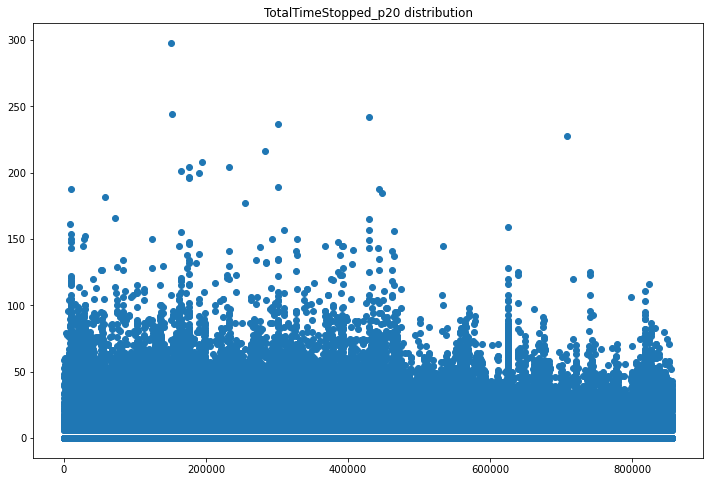

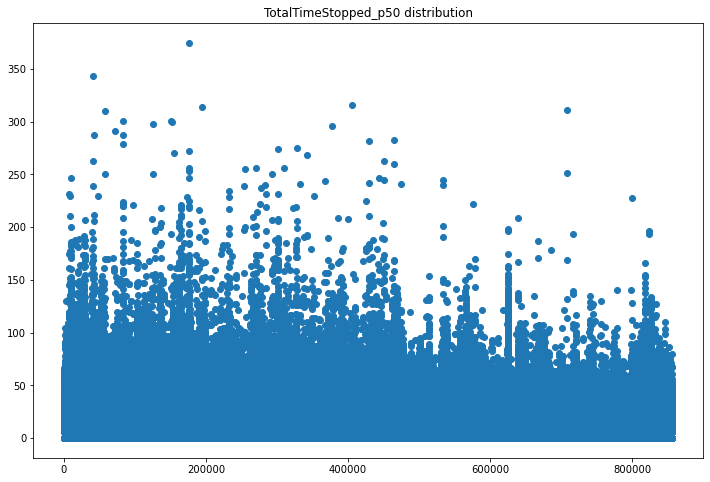

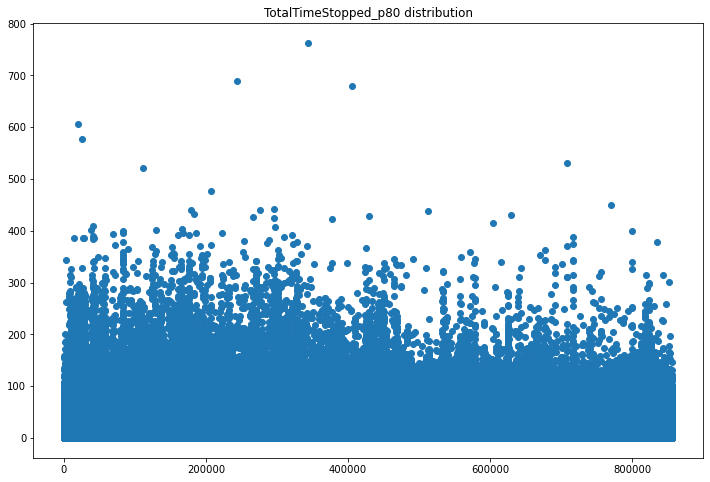

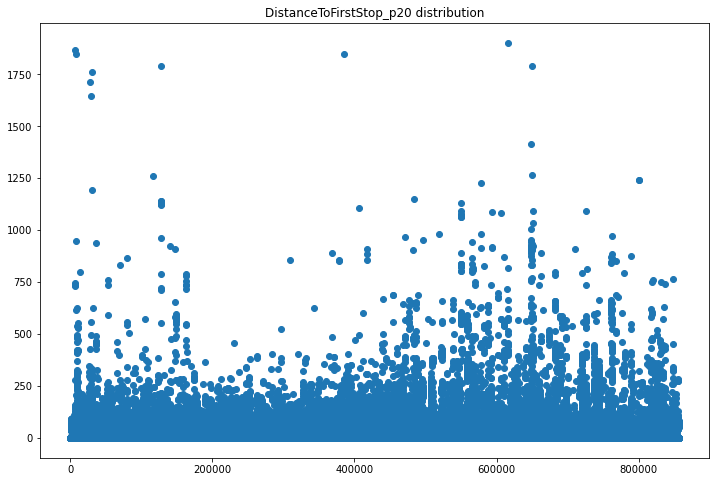

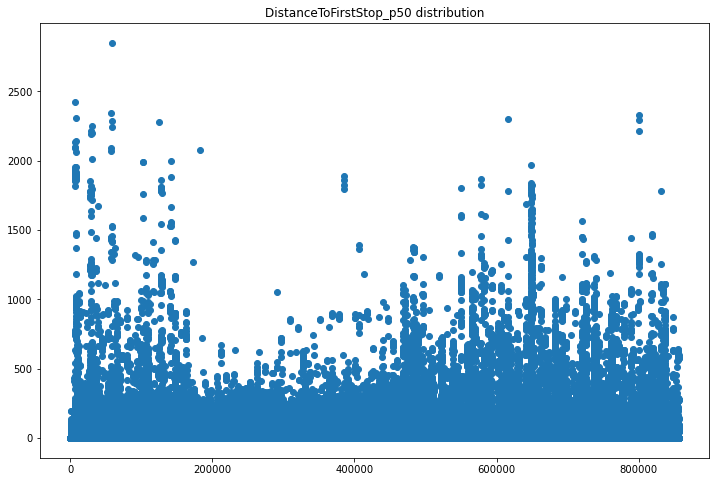

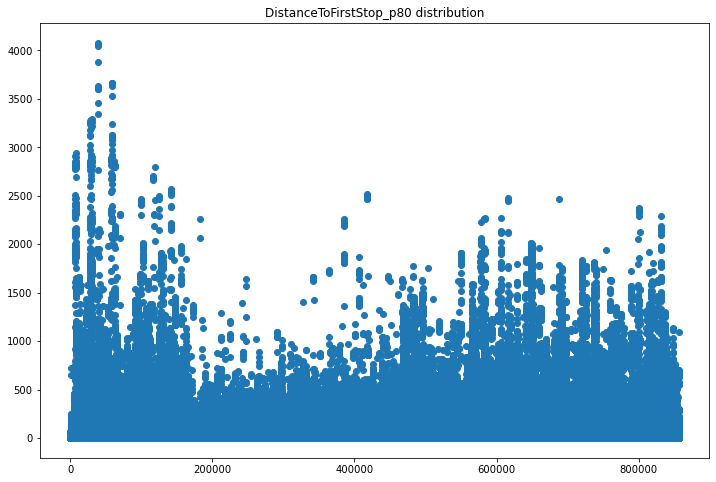

In [12]:
for i in ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80', 'DistanceToFirstStop_p20', 
          'DistanceToFirstStop_p50', 'DistanceToFirstStop_p80']:
    plt.figure(figsize = (12, 8))
    plt.scatter(train_df.index, train_df[i])
    plt.title('{} distribution'.format(i))

### Lots of 0s, let's calculate the percentage of 0 in each of the target variables.

In [13]:
def tv_ratio(train, column):
    df = train_df[train_df[column]==0]
    ratio = df.shape[0] / train.shape[0]
    return ratio

target_variables = ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80', 
                    'DistanceToFirstStop_p20', 'DistanceToFirstStop_p50', 'DistanceToFirstStop_p80']

for i in target_variables:
    print('{} have a 0 ratio of: '.format(i), tv_ratio(train_df, i))

TotalTimeStopped_p20 have a 0 ratio of:  0.9093610081049128
TotalTimeStopped_p50 have a 0 ratio of:  0.6858467900841828
TotalTimeStopped_p80 have a 0 ratio of:  0.3418093849857321
DistanceToFirstStop_p20 have a 0 ratio of:  0.9093693171836497
DistanceToFirstStop_p50 have a 0 ratio of:  0.6858539121516716
DistanceToFirstStop_p80 have a 0 ratio of:  0.3418141330307246


91% of the observations are intersections where 20% of the users diden't stop. 

68% of the observations are intersections where 50% of the users diden't stop. 

34% of the observations are intersections where 80% of the users diden't stop.

### Latitude, Longitude

In [147]:
sns.set_style("whitegrid")

In [148]:
def scatter_plot(data, column1, column2, city = 'All'):
    if city == 'All':
        plt.figure(figsize = (12, 8))
        sns.scatterplot(data[column1], data[column2])
        plt.title('{} vs {} scatter plot'.format(column1, column2))
        plt.show()
    elif city == 'Atlanta':
        data1 = data[data['City']=='Atlanta']
        plt.figure(figsize = (12, 8))
        sns.scatterplot(data1[column1], data1[column2])
        plt.title('{} vs {} scatter plot for Atlanta city'.format(column1, column2))
        plt.show()
    elif city == 'Boston':
        data1 = data[data['City']=='Boston']
        plt.figure(figsize = (12, 8))
        sns.scatterplot(data1[column1], data1[column2])
        plt.title('{} vs {} scatter plot for Boston city'.format(column1, column2))
        plt.show()
    elif city == 'Chicago':
        data1 = data[data['City']=='Chicago']
        plt.figure(figsize = (12, 8))
        sns.scatterplot(data1[column1], data1[column2])
        plt.title('{} vs {} scatter plot for Chicago'.format(column1, column2))
        plt.show()
    elif city == 'Philadelphia':
        data1 = data[data['City']=='Philadelphia']
        plt.figure(figsize = (12, 8))
        sns.scatterplot(data1[column1], data1[column2])
        plt.title('{} vs {} scatter plot for Philadelphia'.format(column1, column2))
        plt.show()

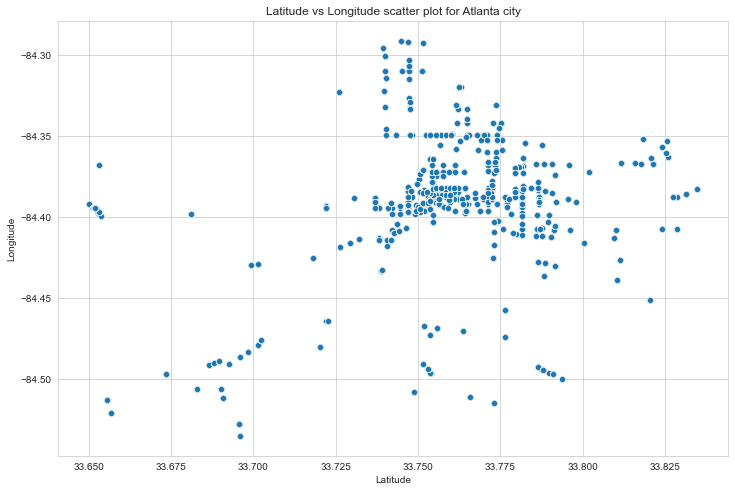

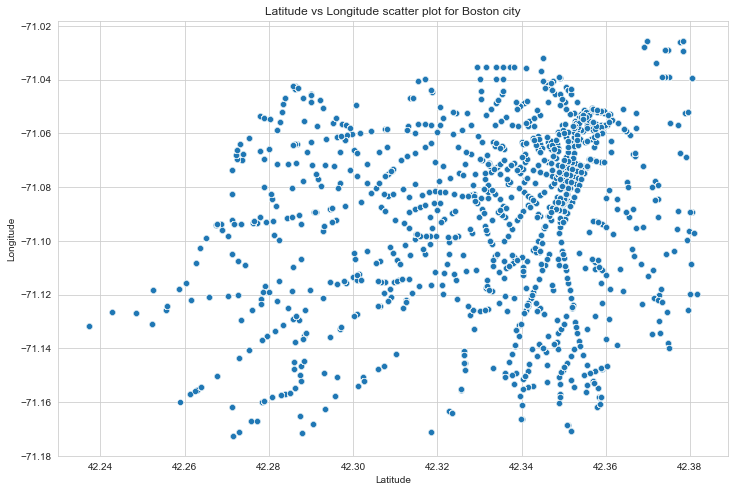

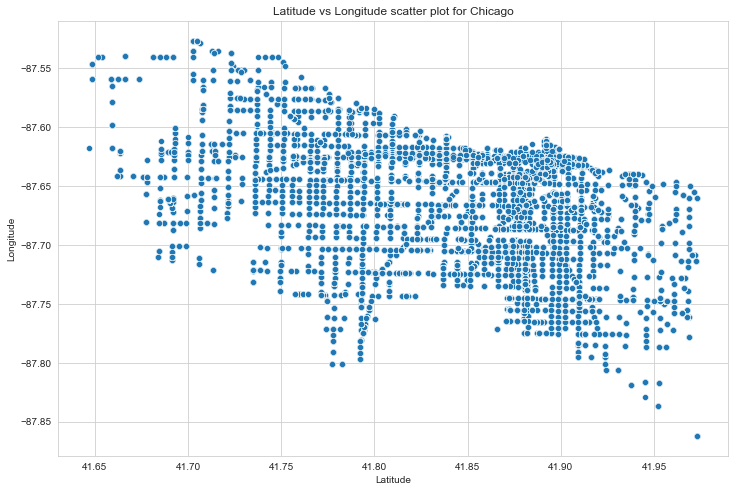

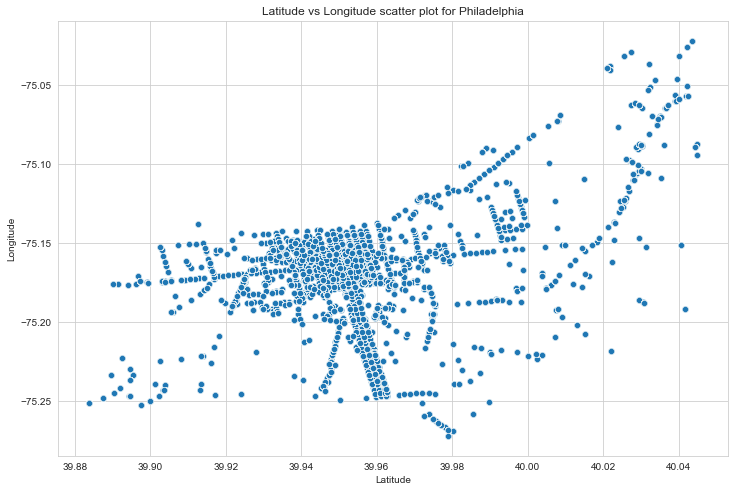

In [150]:
scatter_plot(train_df, 'Latitude', 'Longitude', city = 'Atlanta')
scatter_plot(train_df, 'Latitude', 'Longitude', city = 'Boston')
scatter_plot(train_df, 'Latitude', 'Longitude', city = 'Chicago')
scatter_plot(train_df, 'Latitude', 'Longitude', city = 'Philadelphia')

#### Look's like no outliers in this data

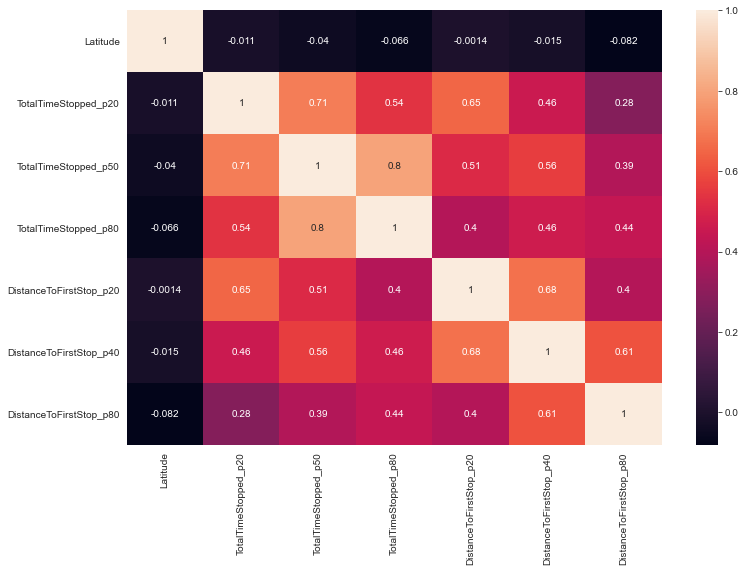

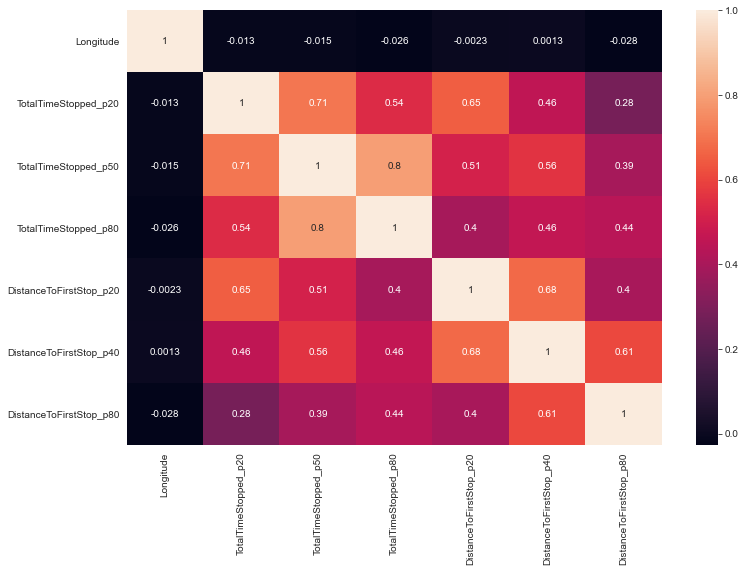

In [138]:
def get_correlation(train, column):
    df = train[[column, 'TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80',
               'DistanceToFirstStop_p20', 'DistanceToFirstStop_p40', 'DistanceToFirstStop_p80']]
    correlation = df.corr()
    plt.figure(figsize = (12, 8))
    sns.heatmap(correlation, annot = True)
    return df
    
df = get_correlation(train_df, 'Latitude')
df = get_correlation(train_df, 'Longitude')

## Latitude and Longitude have a very low correlation with the target variables.

# Time features

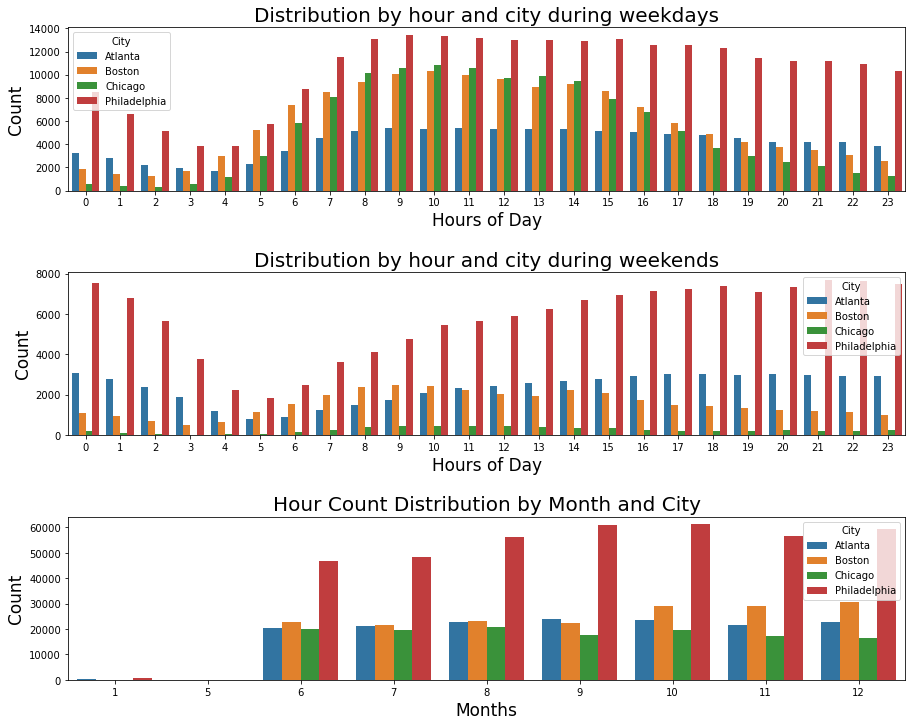

In [19]:
plt.figure(figsize=(15,12))

plt.subplot(311)
g = sns.countplot(x="Hour", data= train_df[train_df['Weekend']==0], hue='City', dodge=True)
g.set_title("Distribution by hour and city during weekdays", fontsize=20)
g.set_ylabel("Count",fontsize= 17)
g.set_xlabel("Hours of Day", fontsize=17)
# sizes=[]
# for p in g.patches:
#     height = p.get_height()
#     sizes.append(height)

# g.set_ylim(0, max(sizes) * 1.15)

plt.subplot(312)
g1 = sns.countplot(x="Hour", data= train_df[train_df['Weekend']==1], hue='City', dodge=True)
g1.set_title("Distribution by hour and city during weekends", fontsize=20)
g1.set_ylabel("Count",fontsize= 17)
g1.set_xlabel("Hours of Day", fontsize=17)
# sizes=[]
# for p in g1.patches:
#     height = p.get_height()
#     sizes.append(height)

# g1.set_ylim(0, max(sizes) * 1.15)

plt.subplot(313)
g2 = sns.countplot(x="Month", data=train_df, hue='City', dodge=True)
g2.set_title("Hour Count Distribution by Month and City", fontsize=20)
g2.set_ylabel("Count",fontsize= 17)
g2.set_xlabel("Months", fontsize=17)
# sizes=[]
# for p in g1.patches:
#     height = p.get_height()
#     sizes.append(height)

# g1.set_ylim(0, max(sizes) * 1.15)

plt.subplots_adjust(hspace = 0.5)

plt.show()

In [20]:
def get_target_mean(train, column, target_variables):
    df = train.groupby([column])[target_variables].agg(['mean']).reset_index()
    df.columns = [column] + [x + '_mean' for x in target_variables]
    return df

get_target_mean(train_df, 'Month', target_variables)

,Month,TotalTimeStopped_p20_mean,TotalTimeStopped_p50_mean,TotalTimeStopped_p80_mean,DistanceToFirstStop_p20_mean,DistanceToFirstStop_p50_mean,DistanceToFirstStop_p80_mean
0,1,0.539586,2.036541,8.964677,1.718027,6.600853,32.325457
1,5,1.057143,2.251429,7.902857,2.765714,12.113143,37.552000
2,6,1.938450,8.115508,23.628294,7.495671,30.065720,85.267075
3,7,1.618742,7.356617,22.211238,6.372036,27.372634,80.458412
4,8,1.612124,7.500079,22.674839,6.401907,28.363994,84.428973
5,9,1.832522,7.853826,23.129744,7.083090,30.047580,87.313143
6,10,1.767700,7.805805,23.082432,6.751673,29.243616,85.240147
7,11,1.704555,7.547377,22.786209,6.593560,28.493218,84.055082
8,12,1.540333,7.197585,22.011604,6.076905,27.672186,81.979143


Month should be a good predictor for the target variables.

In [22]:
get_target_mean(train_df, 'Hour', target_variables)

,Hour,TotalTimeStopped_p20_mean,TotalTimeStopped_p50_mean,TotalTimeStopped_p80_mean,DistanceToFirstStop_p20_mean,DistanceToFirstStop_p50_mean,DistanceToFirstStop_p80_mean
0,0,0.864525,4.473969,15.771666,3.925206,20.201602,69.098339
1,1,0.828718,4.062187,14.516623,3.949375,19.108701,64.687011
2,2,0.740107,3.547907,13.154688,3.274154,16.954275,58.144694
3,3,0.607031,2.893898,11.471349,2.952136,13.138561,47.868770
4,4,0.497371,2.603856,10.765630,2.119654,10.839381,41.653491
5,5,0.595665,3.232381,12.603060,2.710943,13.173870,46.064890
6,6,0.906521,4.959961,17.474516,4.067491,20.666642,63.946633
7,7,1.905483,8.327022,24.015582,7.476197,31.239976,84.805708
8,8,2.308179,9.614992,26.763960,8.616668,33.278096,90.570702
9,9,1.636090,8.071838,24.203293,6.270117,28.590282,83.117824


Hour should be a good predictor as well.

In [23]:
get_target_mean(train_df, 'Weekend', target_variables)

,Weekend,TotalTimeStopped_p20_mean,TotalTimeStopped_p50_mean,TotalTimeStopped_p80_mean,DistanceToFirstStop_p20_mean,DistanceToFirstStop_p50_mean,DistanceToFirstStop_p80_mean
0,0,1.922954,8.508188,24.642271,7.249009,30.978841,87.989575
1,1,1.168857,5.303631,17.917121,5.157083,22.901544,73.988780


Weekend should be a good predictor as well.

# City

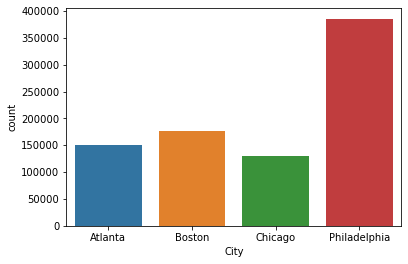

In [24]:
train_plot = sns.countplot(x="City", data=train_df)

In [25]:
get_target_mean(train_df, 'City', target_variables)

,City,TotalTimeStopped_p20_mean,TotalTimeStopped_p50_mean,TotalTimeStopped_p80_mean,DistanceToFirstStop_p20_mean,DistanceToFirstStop_p50_mean,DistanceToFirstStop_p80_mean
0,Atlanta,1.982219,9.561990,28.661106,6.380327,30.672577,105.777004
1,Boston,1.804238,8.568312,25.920588,5.692486,23.469332,62.896978
2,Chicago,1.809720,7.088462,21.321645,6.682790,24.580853,69.790891
3,Philadelphia,1.532707,6.594667,19.508972,7.215014,31.756791,90.069086


City is a good predictor for sure.

In [27]:
# Group data by City
train_df_A = train_df[train_df['City']=='Atlanta']
train_df_B = train_df[train_df['City']=='Boston']
train_df_C = train_df[train_df['City']=='Chicago']
train_df_P = train_df[train_df['City']=='Philadelphia']

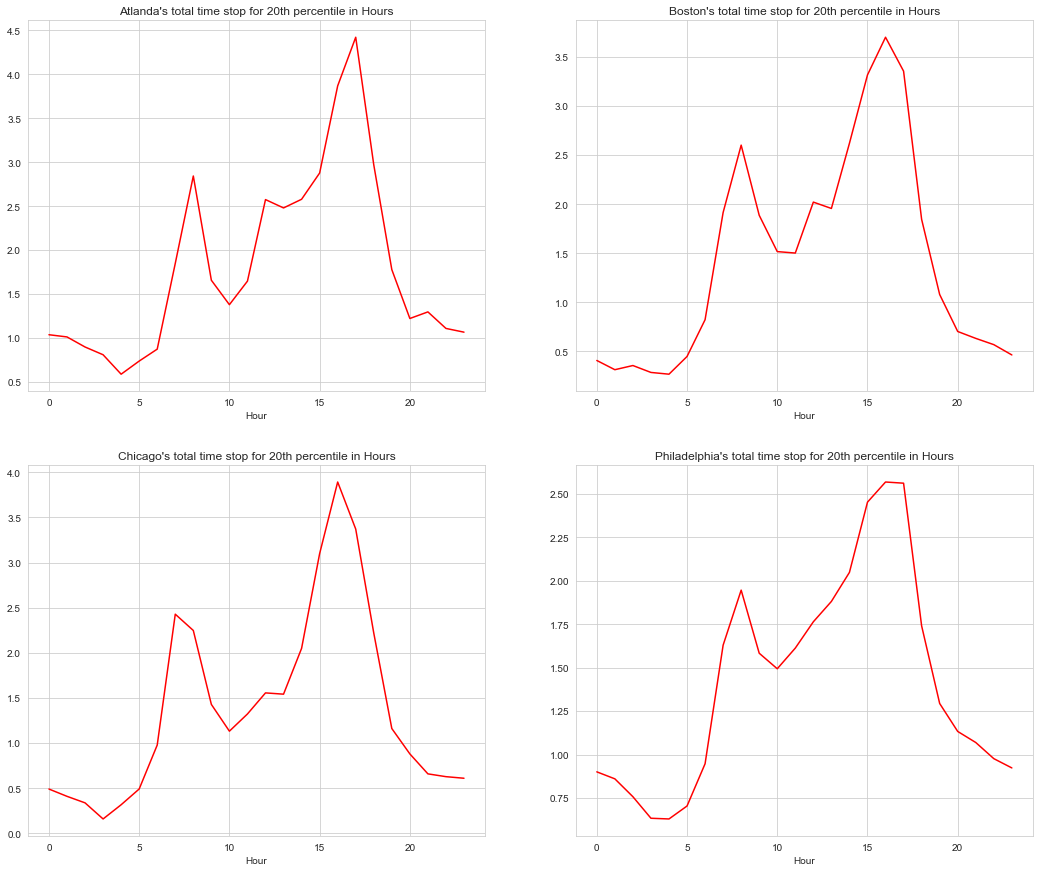

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=2)
sns.set_style("whitegrid")

train_df_A.groupby('Hour')['TotalTimeStopped_p20'].mean().plot(
    ax=ax[0,0],title="Atlanda's total time stop for 20th percentile in Hours", color='r', figsize=(18,15))

train_df_B.groupby('Hour')['TotalTimeStopped_p20'].mean().plot(
    ax=ax[0,1],title="Boston's total time stop for 20th percentile in Hours", color='r', figsize=(18,15))


train_df_C.groupby('Hour')['TotalTimeStopped_p20'].mean().plot(
    ax=ax[1,0],title="Chicago's total time stop for 20th percentile in Hours", color='r', figsize=(18,15))


train_df_P.groupby('Hour')['TotalTimeStopped_p20'].mean().plot(
    ax=ax[1,1],title="Philadelphia's total time stop for 20th percentile in Hours", color='r', figsize=(18,15))

plt.show()

Findings: 

For all cities peak hours looks like from 15:00-18:00. Average time stopped for first 20% of the cars is significantly low but it shows the same peak hours as before for all 4 cities.

Philadelphia have most of the total entries followed by Boston, Atlanta, Chicago.

During the weekdays, 08:00 to 17:00 is the rush hour in all cities, but for Philadelphia, it is 08:00 to 24:00.

During the Weekend days: As expected, we see a peak on late night and also throughout the day except in the early morning.

It's seem that we have only six month of data only.


# Intersections

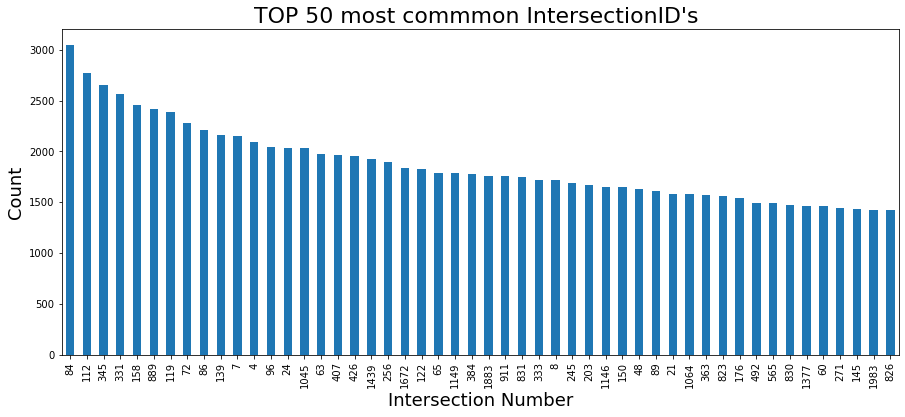

In [17]:
'''Visulization of IntersectionID'''
plt.figure(figsize=(15,6))
#color_dict = {'Atlanta':'green', 'Boston': 'red', 'Chicago':'blue', 'Philadelphia': 'cyan'}
train_df.IntersectionId.value_counts()[:50].plot(kind='bar' )
plt.xlabel("Intersection Number", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most commmon IntersectionID's ", fontsize=22)
plt.show()

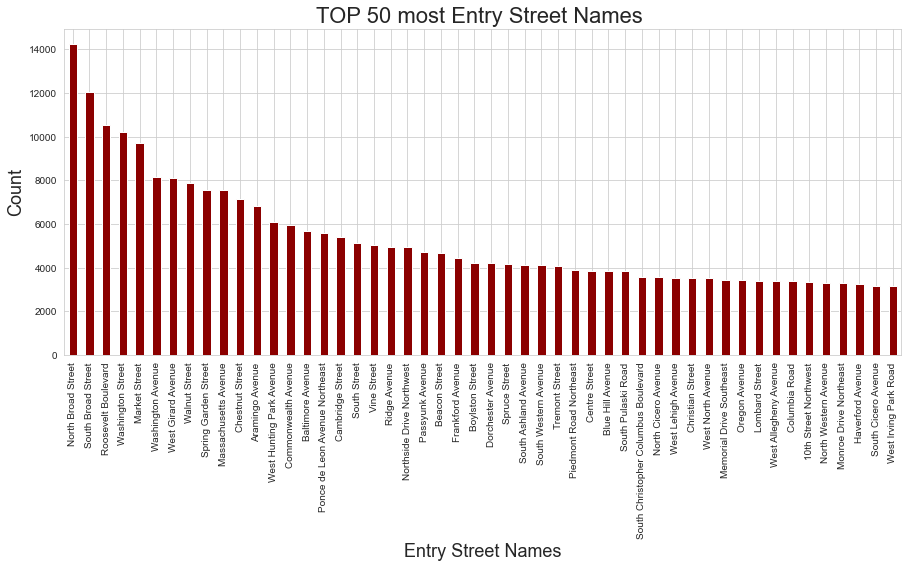

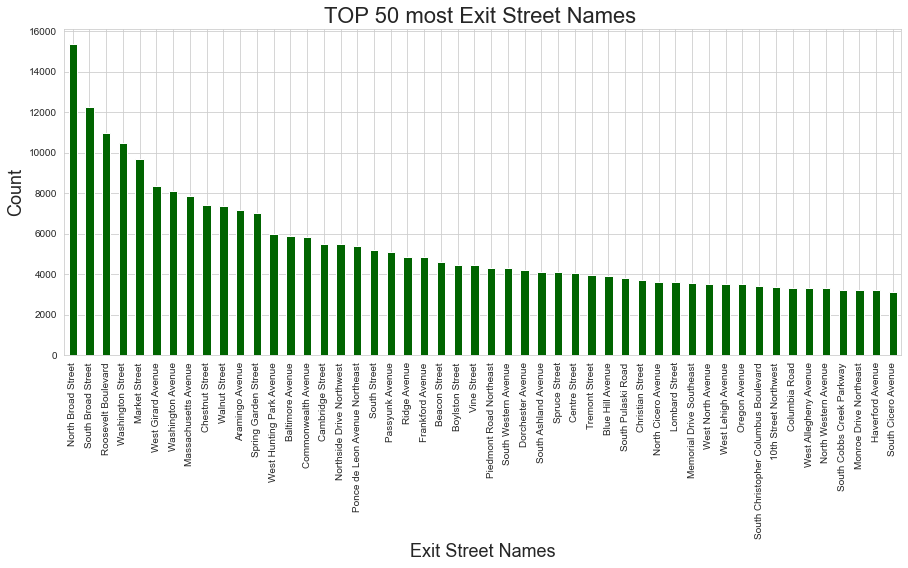

In [30]:
'''Visulization of Entry/Exit StreetNames'''
plt.figure(figsize=(15,6))
train_df['EntryStreetName'].value_counts()[:50].plot(kind='bar', color = 'darkred')
plt.xlabel("Entry Street Names", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most Entry Street Names ", fontsize=22)
plt.show()

plt.figure(figsize=(15,6))
train_df['ExitStreetName'].value_counts()[:50].plot(kind='bar', color = 'darkgreen')
plt.xlabel("Exit Street Names", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most Exit Street Names ", fontsize=22)
plt.show()

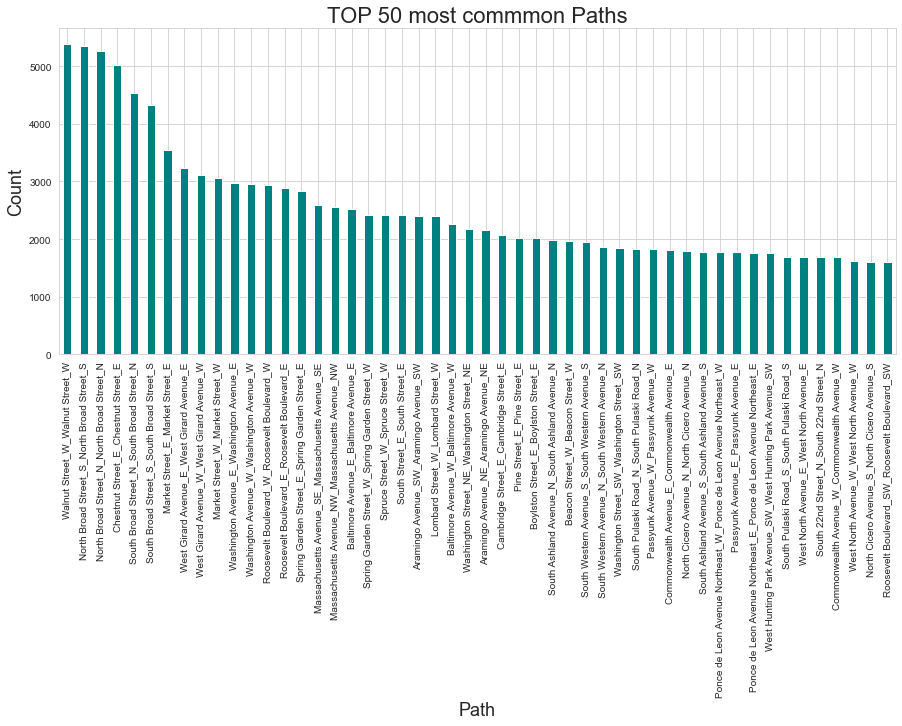

In [31]:
'''Visulization of Path'''
plt.figure(figsize=(15,6))
train_df.Path.value_counts()[:50].plot(kind='bar', color = 'teal')
plt.xlabel("Path", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most commmon Paths", fontsize=22)
plt.show()

# Feature Engineering

In [29]:
# 6 variables to be predicted
y1 = "TotalTimeStopped_p20"
y2 = "TotalTimeStopped_p50"
y3 = "TotalTimeStopped_p80"
y4 = "DistanceToFirstStop_p20"
y5 = "DistanceToFirstStop_p50"
y6 = "DistanceToFirstStop_p80"


In [30]:
#Dummies for train data
dfcity= pd.get_dummies(train_df["City"],prefix = 'city')
dfen = pd.get_dummies(train_df["EntryHeading"],prefix = 'en')
dfex = pd.get_dummies(train_df["ExitHeading"],prefix = 'ex')

train_df = pd.concat([train_df,dfcity],axis=1)
train_df = pd.concat([train_df,dfen],axis=1)
train_df = pd.concat([train_df,dfex],axis=1)

directions = {
    "N": 0,
    "NE": 1/4,
    "E": 1/2,
    "SE": 3/4,
    "S": 1,
    "SW": 5/4,
    "W": 3/2,
    "NW": 7/4
}

train_df['EntryHeading'] = train_df['EntryHeading'].map(directions)
train_df['ExitHeading'] = train_df['ExitHeading'].map(directions)

train_df['EntryExitSameSt'] = (train_df['EntryStreetName'] == train_df['ExitStreetName']).astype(int)

In [31]:
features_list = ["IntersectionId","Hour", "Weekend",
       "Month","city_Atlanta", "city_Boston", "city_Chicago", "city_Philadelphia",
       "en_E", "en_N", "en_NE", "en_NW", "en_S", "en_SE", "en_SW", "en_W",
       "ex_E", "ex_N", "ex_NE", "ex_NW", "ex_S", "ex_SE", "ex_SW", "ex_W", 
       "EntryExitSameSt"]

In [32]:
train_df.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,en_W,ex_E,ex_N,ex_NE,ex_NW,ex_S,ex_SE,ex_SW,ex_W,EntryExitSameSt
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,1.75,1.75,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,0.75,0.75,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,1.75,1.75,1,0,...,0,0,0,0,1,0,0,0,0,1
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,0.75,0.75,1,0,...,0,0,0,0,0,0,1,0,0,1
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,1.75,1.75,2,0,...,0,0,0,0,1,0,0,0,0,1


In [33]:
train_data_df = train_df[features_list]

In [34]:
train_data_df.head()

,IntersectionId,Hour,Weekend,Month,city_Atlanta,city_Boston,city_Chicago,city_Philadelphia,en_E,en_N,...,en_W,ex_E,ex_N,ex_NE,ex_NW,ex_S,ex_SE,ex_SW,ex_W,EntryExitSameSt
0,0,0,0,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,0,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,2,0,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Running multiple models for the target variables TotalTimeStopped_p20 and DistanceToFirstStop_p20 to see the performance:

In [ ]:
target_list = ["TotalTimeStopped_p20","TotalTimeStopped_p50", "TotalTimeStopped_p80",
       "DistanceToFirstStop_p20","DistanceToFirstStop_p50", "DistanceToFirstStop_p80"]

In [51]:
stop_20 = train_df['TotalTimeStopped_p20']
stop_50 = train_df['TotalTimeStopped_p50']
stop_80 = train_df['TotalTimeStopped_p80']
dist_20 = train_df['DistanceToFirstStop_p20']
dist_50 = train_df['DistanceToFirstStop_p50']
dist_80 = train_df['DistanceToFirstStop_p80']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(train_data_df, stop_20, test_size=0.3, random_state=0)

In [127]:
from sklearn import tree

dict_classifiers = {
   "LinearRegression": LinearRegression(),
   "GradientBoosting": GradientBoostingRegressor(loss='ls', n_estimators=250, max_depth=3,learning_rate=.5, min_samples_leaf=9, min_samples_split=9),
   "Ridge Model": Ridge(),
   "DecisionTree": tree.DecisionTreeClassifier(max_depth=11),
   "RandomForest": RandomForestRegressor(n_estimators=250, max_depth=5, min_samples_leaf=5, min_samples_split=7)
}

In [130]:
%%time

for model, model_instantiation in dict_classifiers.items():
    fit= model_instantiation.fit(X_train, y_train)
    mae=mean_absolute_error(model_instantiation.predict(X_test),y_test)
    score=model_instantiation.score(X_train, y_train)
    print("Mean Absolute Error for ",model, mae, "Score:", score)


Mean Absolute Error for  LinearRegression 3.032849820238634 Score: 0.019337651375073706
Mean Absolute Error for  GradientBoosting 2.750870923024417 Score: 0.1541768029591556
Mean Absolute Error for  Ridge Model 3.032850538103435 Score: 0.019337651372977827
Mean Absolute Error for  DecisionTree 1.7201150607748796 Score: 0.9103839814419145
Mean Absolute Error for  RandomForest 2.98925525018346 Score: 0.03162954957621833
Wall time: 7min 32s


In [54]:
%%time

for model, model_instantiation in dict_classifiers.items():
    fit= model_instantiation.fit(X_train, y_train)
    mse=mean_squared_error(model_instantiation.predict(X_test),y_test)
    score=model_instantiation.score(X_train, y_train)
    print("Mean squared Error for ",model, mse, "Score:", score)


Mean squared Error for  LinearRegression 48.70494325256879 Score: 0.019337651375073706
Mean squared Error for  GradientBoosting 42.13124268833016 Score: 0.15417680295915603
Mean squared Error for  Ridge Model 48.704943497676425 Score: 0.019337651372977827
Mean squared Error for  DecisionTree 52.47040785641935 Score: 0.9103873729049238
Mean squared Error for  RandomForest 48.05488840782504 Score: 0.031710301342476765
Wall time: 7min 39s


In [76]:
X_train, X_test, y_train, y_test = train_test_split(train_data_df, dist_20, test_size=0.3, random_state=0)

In [78]:
from sklearn import utils
print(utils.multiclass.type_of_target(y_test))

continuous


In [81]:
y_test

427870     0.0
84946     51.9
657471     0.0
653798     0.0
790643     0.0
          ... 
792719     0.0
592628     0.0
748090     0.0
288904     0.0
198204     0.0
Name: DistanceToFirstStop_p20, Length: 252736, dtype: float64

In [75]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
y_test_encoded = lab_enc.fit_transform(y_test)

In [80]:
y_test_encoded

array([  0, 474,   0, ...,   0,   0,   0], dtype=int64)

In [79]:
from sklearn import utils
print(utils.multiclass.type_of_target(y_test_encoded))

multiclass


In [82]:
%%time
for model, model_instantiation in dict_classifiers.items():
    fit= model_instantiation.fit(X_train, y_train_encoded)
    mse=mean_squared_error(model_instantiation.predict(X_test),y_test_encoded)
    score=model_instantiation.score(X_train, y_train_encoded)
    print("Mean squared Error for ",model, mse, "Score:", score)

Mean squared Error for  LinearRegression 42019.49229246496 Score: 0.014218304390893444
Mean squared Error for  GradientBoosting 35083.168801675034 Score: 0.17885300481938582
Mean squared Error for  Ridge Model 42019.49169123436 Score: 0.014218304388468495
Mean squared Error for  DecisionTree 45856.60233603444 Score: 0.9102466271900372


KeyboardInterrupt: 

# Keras model 

In [131]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse,mean_absolute_error,accuracy_score

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

X = train_df[features_list].values
y_true = train_df['TotalTimeStopped_p20'].values


epoc = 35 #@param {type:"slider", min:0, max:100, step:1}

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)

model = Sequential()

model.add(Dense(1, input_shape=(25,)))

model.compile(Adam(lr=0.5), 'mean_absolute_error')

model.fit(X_train, y_train, epochs=epoc )

Epoch 1/35
21062/21062 [==============================] - 9s 404us/step - loss: 50.1752
Epoch 2/35
21062/21062 [==============================] - 9s 415us/step - loss: 50.0795
Epoch 3/35
21062/21062 [==============================] - 9s 427us/step - loss: 49.3037
Epoch 4/35
21062/21062 [==============================] - 9s 404us/step - loss: 50.4654
Epoch 5/35
21062/21062 [==============================] - 9s 431us/step - loss: 50.9754
Epoch 6/35
21062/21062 [==============================] - 8s 399us/step - loss: 52.0595
Epoch 7/35
21062/21062 [==============================] - 9s 410us/step - loss: 48.1572
Epoch 8/35
21062/21062 [==============================] - 8s 400us/step - loss: 48.8530
Epoch 9/35
21062/21062 [==============================] - 9s 407us/step - loss: 49.1029
Epoch 10/35
21062/21062 [==============================] - 8s 400us/step - loss: 49.6391
Epoch 11/35
21062/21062 [==============================] - 9s 408us/step - loss: 48.7472
Epoch 12/35
21062/21062 [=====

# Choosing Gradient Boosting Regressor and looping over all the target variables

In [134]:
train_data_df.head()

,IntersectionId,Hour,Weekend,Month,city_Atlanta,city_Boston,city_Chicago,city_Philadelphia,en_E,en_N,...,en_W,ex_E,ex_N,ex_NE,ex_NW,ex_S,ex_SE,ex_SW,ex_W,EntryExitSameSt
0,0,0,0,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,0,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,2,0,6,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [137]:
%%time
S=['TotalTimeStopped_p20','TotalTimeStopped_p50','TotalTimeStopped_p80','DistanceToFirstStop_p20','DistanceToFirstStop_p50','DistanceToFirstStop_p80']
output=X_test.copy()
act=pd.DataFrame()

for i in S:
    stop = train_df[i]    
    #lr=LinearRegression()
    #dt=tree.DecisionTreeClassifier(max_depth=11)
    gb=GradientBoostingRegressor(loss='ls', n_estimators=250, max_depth=3,learning_rate=.8, min_samples_leaf=9, min_samples_split=9)
    X_train, X_test, y_train, y_test = train_test_split(train_data_df, stop, test_size=0.3, random_state=0)
    fit= gb.fit(X_train, y_train)
    mae=mean_absolute_error(gb.predict(X_test),y_test)
    y_hat=gb.predict(X_test)
    output[i]=y_hat
    act[i]=y_test
    print("Mean absolute error for",i,"is",mae)    
    
output.head()

Mean absolute error for TotalTimeStopped_p20 is 2.765060984077047
Mean absolute error for TotalTimeStopped_p50 is 8.398489997874401
Mean absolute error for TotalTimeStopped_p80 is 15.816652121639805
Mean absolute error for DistanceToFirstStop_p20 is 10.591857297677558
Mean absolute error for DistanceToFirstStop_p50 is 31.6728285624842
Mean absolute error for DistanceToFirstStop_p80 is 62.90096079538915
Wall time: 20min 37s


,IntersectionId,Hour,Weekend,Month,city_Atlanta,city_Boston,city_Chicago,city_Philadelphia,en_E,en_N,...,ex_SE,ex_SW,ex_W,EntryExitSameSt,TotalTimeStopped_p20,TotalTimeStopped_p50,TotalTimeStopped_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p50,DistanceToFirstStop_p80
427870,2003,12,0,11,0,0,1,0,0,0,...,0,0,0,1,0.227681,3.954888,19.446351,0.269736,20.505221,61.568232
84946,267,5,0,6,1,0,0,0,1,0,...,0,0,0,1,-0.665146,7.202732,11.695937,1.593253,15.133790,62.044463
657471,951,18,0,10,0,0,0,1,0,0,...,0,0,0,1,1.920998,9.930147,23.579238,7.145383,32.077685,113.404444
653798,926,20,0,10,0,0,0,1,0,1,...,0,0,0,0,0.715217,7.051603,23.183248,3.329275,29.376007,99.239883
790643,1639,21,0,10,0,0,0,1,1,0,...,0,0,0,1,0.306590,2.817409,11.245847,-0.558769,14.739376,72.522444


In [151]:
output.head()

,IntersectionId,Hour,Weekend,Month,city_Atlanta,city_Boston,city_Chicago,city_Philadelphia,en_E,en_N,...,ex_SE,ex_SW,ex_W,EntryExitSameSt,TotalTimeStopped_p20,TotalTimeStopped_p50,TotalTimeStopped_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p50,DistanceToFirstStop_p80
427870,2003,12,0,11,0,0,1,0,0,0,...,0,0,0,1,0.227681,3.954888,19.446351,0.269736,20.505221,61.568232
84946,267,5,0,6,1,0,0,0,1,0,...,0,0,0,1,-0.665146,7.202732,11.695937,1.593253,15.133790,62.044463
657471,951,18,0,10,0,0,0,1,0,0,...,0,0,0,1,1.920998,9.930147,23.579238,7.145383,32.077685,113.404444
653798,926,20,0,10,0,0,0,1,0,1,...,0,0,0,0,0.715217,7.051603,23.183248,3.329275,29.376007,99.239883
790643,1639,21,0,10,0,0,0,1,1,0,...,0,0,0,1,0.306590,2.817409,11.245847,-0.558769,14.739376,72.522444


In [153]:
output.to_excel(r'C:\Users\dbarman\Desktop\HLS Files\Personal\BrainStation\ML\Final\Submission.xlsx', sheet_name='Output', index = False)

In [115]:
predicted=output.iloc[:,-6:]
predicted.describe()

,TotalTimeStopped_p20,TotalTimeStopped_p50,TotalTimeStopped_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p50,DistanceToFirstStop_p80
count,252736.000000,252736.000000,252736.000000,252736.000000,252736.000000,252736.000000
mean,1.714569,7.609329,22.805060,6.666899,28.724859,84.086570
std,2.699987,7.602011,14.746591,11.632423,40.584503,97.908244
min,-16.786110,-14.310826,-28.462320,-33.173971,-93.933142,-245.918388
25%,0.184177,2.720224,12.860687,1.188612,10.888750,43.535545
50%,0.970822,5.747186,19.980308,4.098690,21.681910,66.785034
75%,2.398498,10.411363,29.690479,8.780190,35.875534,94.925690
max,57.090275,105.430617,161.548029,314.756455,923.776665,1667.287169


In [124]:
df = act[["TotalTimeStopped_p20","TotalTimeStopped_p50","TotalTimeStopped_p80","DistanceToFirstStop_p20","DistanceToFirstStop_p50","DistanceToFirstStop_p80"]]
df.describe()

,TotalTimeStopped_p20,TotalTimeStopped_p50,TotalTimeStopped_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p50,DistanceToFirstStop_p80
count,252736.000000,252736.000000,252736.000000,252736.000000,252736.000000,252736.000000
mean,1.720982,7.650465,22.803597,6.723497,28.866006,84.179909
std,7.050242,15.607345,27.968652,29.974362,76.487771,162.575107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,16.000000,0.000000,0.000000,60.400000
75%,0.000000,10.000000,34.000000,0.000000,52.900000,85.800000
max,228.000000,375.000000,578.000000,1901.900000,2421.500000,3659.100000


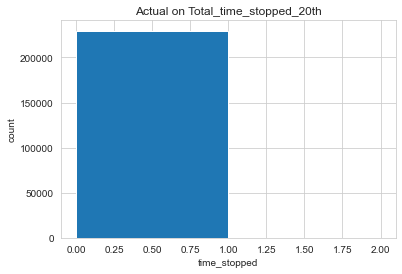

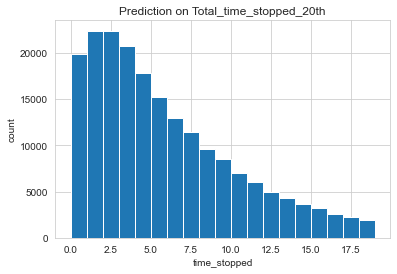

In [125]:
fig, ax = plt.subplots()
sns.set_style("whitegrid")

plt.hist(act['DistanceToFirstStop_p20'].astype('float'), bins = range(0,3))
plt.title("Actual on Total_time_stopped_20th")
plt.xlabel("time_stopped")
plt.ylabel("count")
plt.show()

plt.hist(output['DistanceToFirstStop_p20'].astype('float'), bins = range(0,20)) #, bins = range(stop_20.min(),stop_20.max(),3), range=(stop_20.min(),stop_20.max()))
plt.title("Prediction on Total_time_stopped_20th")
plt.xlabel("time_stopped")
plt.ylabel("count")
plt.show()